In [1]:
print("caitao")

caitao


In [2]:
def InsertionSort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i+1] = A[i]
            i = i - 1
        A[i+1] = key

input = [8, 3, 9, 15, 29, 7, 10]
InsertionSort(input)
print(input)

[3, 7, 8, 9, 10, 15, 29]


In [4]:
import random
random.random()

0.2567277114648495

caitao


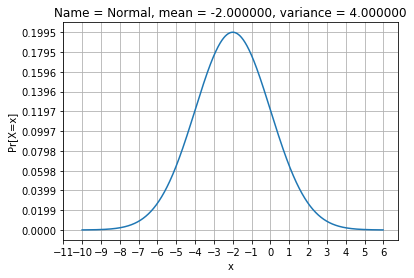

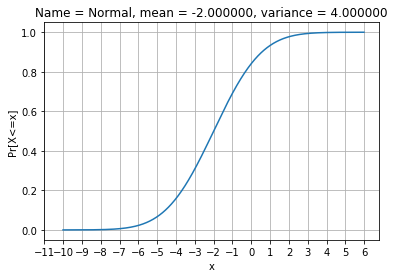

In [6]:
__author__ = 'Caitao Zhan'
__email__  = 'caitao.zhan@stonybrook.edu'


import numpy as np
import matplotlib.pyplot as plt
from scipy import special


class DistriBase:
    """The base class for all distributions.
    
    Attributes:
        name (str): the name of the distribution
        X   (list): x-axis 
        P   (list): y-axis (Probability distribution)
        C   (list): y-axis (Cumulative  distribution)
    """
    def __init__(self, distriName):
        self.name = distriName
        self.X = []
        self.P = []
        self.C = []

    def setName(self, distriName):
        self.name = distriName

    def getName(self):
        return self.name

    def plot(self):
        """Plot probability distribution function and cumulative distribution function."""
        pass

if __name__ == '__main__':
    distriBase = DistriBase('caitao')
    print(distriBase.getName())


class Normal(DistriBase):
    """Normal distribution.
    Args:
        m (float): mean or expectation of the distribution
        v (float): variance, the square of standard deviation
    """

    def __init__(self, m, v):
        """Initialize normal distribution with paramater m and var
           P(x | m, v) = e^( -(x-m)^2 / 2*v ) / (sqrt(2*PI*v))
        Args:
            m (float): mean, or expectation of the distribution
            v (float): variance, or square of standard deviation
        """
        DistriBase.__init__(self, 'Normal')
        self.m = m
        self.v = v
        self.xLen = np.sqrt(v) * 8       # plot data between [m - 4*sqrt(v), m + 4*sqrt(v)]
        len = self.xLen / 2.0            # len = 4*sqrt(v)
        self.X = np.linspace(m-len, m+len, num=1000, endpoint=False)
        for i in self.X:
            self.P.append(np.exp( -(i-m)**2 / (2*v) ) / np.sqrt(2*np.pi*v) )
        for i in self.X:
            self.C.append( (1 + special.erf( (i-m) / (np.sqrt(v*2))) ) / 2 )

    def __str__(self):
        return 'Name = %s, mean = %f, variance = %f' % (self.getName(), self.m, self.v)

    def plotRange(self, m, len):
        """Slightly adjust the x-axis range to plot more 'beautifully'
        Args:
            m   (float): mean of the distribution
            len (float): len = 4*sqrt(v)
        """
        left  = int(m-len-1) if (m-len < 0) else int(m-len)
        right = int(m+len+1) if (m+len > 0) else int(m+len)
        return left, right

    def plot(self):
        len = self.xLen/2.0
        plt.figure('Probability Distribution')
        plt.plot(self.X, self.P)
        left, right = self.plotRange(self.m, len)
        x_axis = np.arange(left, right, 1)
        y_scale = max(self.P) / 10
        y_axis = np.arange(0, max(self.P)+y_scale, y_scale)
        plt.xticks(x_axis)
        plt.yticks(y_axis)
        plt.xlabel('x')
        plt.ylabel('Pr[X=x]')
        plt.title(str(self))
        plt.grid()

        plt.figure('Cumulative Distribution')
        plt.plot(self.X, self.C)
        left, right = self.plotRange(self.m, len)
        x_axis = np.arange(left, right, 1)
        plt.xticks(x_axis)
        plt.xlabel('x')
        plt.ylabel('Pr[X<=x]')
        plt.title(str(self))
        plt.grid()

        plt.show()


if __name__ == '__main__':
    normal = Normal(-2, 4)
    normal.plot()

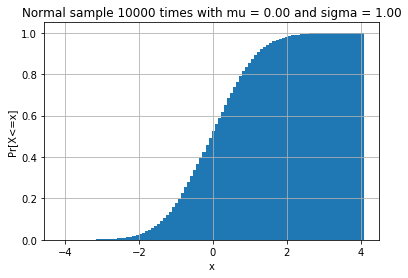

In [7]:
__author__ = 'Caitao Zhan'
__email__  = 'caitao.zhan@stonybrook.edu'


import numpy as np
import matplotlib.pyplot as plt


mu = 0          # mean
sigma = 1       # standard deviation
sample = 10000  # sample times

S = np.random.normal(mu, sigma, sample)
plt.figure('Cumulative Distribution')
plt.hist(S, bins=100, normed=True, cumulative=True)
plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('Normal sample %d times with mu = %.2f and sigma = %.2f' % (sample, mu, sigma))
plt.grid()
plt.show()
